In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pandas as pd
import pickle
import IPython
import IPython.display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from functions.naming import rename_columns

In [13]:
# Load the data
df = pd.read_excel("/Users/athanasioskaravangelis/Desktop/RSM BAM/Workshop/pko_forecasting/data/PKO_Initial_Dataset.xlsx")
#rename columns
df = rename_columns(df)
# select only the values after 2010-01-01
df['date'] = pd.to_datetime(df['date'], format='%b-%y')
df = df[df['date'] > '2009-12-02']
#make date the index
df.set_index('date', inplace=True)

In [14]:
df.columns

Index(['ONI', 'Precipitation_Indonesia', 'Precipitation_Malaysia',
       'Temperaturemin_Indonesia', 'Temperaturemin_Malaysia',
       'Temperaturemax_Indonesia', 'Temperaturemax_Malaysia',
       'Humidex_Indonesia', 'Humidex_Malaysia', 'pko_fob_malaysia',
       'pko_cif_rotterdam', 'coconut_cif_rotterdam', 'palm_oil_cif_nwe',
       'palm_olein_fob_malaysia', 'palm_stearin_cif_rotterdam',
       'tallow_fob_us_gulf', 'soybean_oil_zlz2', 'bio_ethanol',
       'fatty_alcohol_c12_14_fob_asia', 'fatty_alcohol_c16_18_fob_asia',
       'fatty_alcohol_c12_14_fd_nwe', 'rspo', 'jet_fuel_europe', 'jet_fuel_us',
       'jet_fuel_us_usd_mt', 'ukraine_war', 'malaysia_harvest',
       'malaysia_disaster', 'indonesia_disaster', 'indonesia_harvest',
       'myr_usd_rate', 'idr_usd_rate', 'palm_oil_harvest_area_indonesia',
       'palm_oil_production_indonesia', 'pko_production_indonesia',
       'palm_oil_harvest_area_malaysia', 'palm_oil_production_malaysia',
       'pko_production_malaysia', 'pk

In [15]:
# fill nas with average values
df = df.fillna(df.mean())
data = df.copy()


In [16]:
# booleans
pko_cif_rotterdam = 1
pko_monthly_stocks_malaysia = 1
pko_monthly_stocks_indonesia = 1
Temperaturemax_Indonesia = 1
Temperaturemin_Malaysia = 1
Temperaturemin_Indonesia = 1
Temperaturemax_Malaysia = 1
Precipitation_Indonesia = 1
Precipitation_Malaysia = 1
Humidex_Indonesia = 1
Humidex_Malaysia = 1
oni = 1
pko_fob_malaysia = 0
coconut_cif_rotterdam = 0
palm_oil_cif_nwe = 0
palm_olein_fob_malaysia = 0
palm_stearin_cif_rotterdam = 0
tallow_fob_us_gulf = 0
soybean_oil_zlz2 = 0
bio_ethanol = 0
fatty_alcohol_c12_14_fob_asia = 0
fatty_alcohol_c16_18_fob_asia = 0
fatty_alcohol_c12_14_fd_nwe = 0
rspo = 0
jet_fuel_europe = 0
jet_fuel_us = 0
jet_fuel_us_usd_mt = 0
ukraine_war = 0
malaysia_harvest = 0
malaysia_disaster = 0
indonesia_disaster = 0
indonesia_harvest = 0
myr_usd_rate = 0
idr_usd_rate = 0
palm_oil_harvest_area_indonesia = 0
palm_oil_production_indonesia = 0
pko_production_indonesia = 0
palm_oil_harvest_area_malaysia = 0
palm_oil_production_malaysia = 0
pko_production_malaysia = 1
pko_domestic_consumption_indonesia = 0
pko_domestic_consumption_malaysia = 0
pko_exports_indonesia = 0
pko_exports_malaysia = 0
pko_total_supply_indonesia = 0
pko_total_supply_malaysia = 0
pmi_indonesia = 0
pmi_malaysia = 0
export_tarrifs_indonesia = 0
cpopc_mal_ind_2015 = 0
mspo_certification = 0
ispo_certification = 0

# put the dataframe columns in the order that you created the booleans
data = data[['pko_cif_rotterdam', 'pko_monthly_stocks_malaysia', 'pko_monthly_stocks_indonesia', 'Temperaturemax_Indonesia',
                'Temperaturemin_Malaysia', 'Temperaturemin_Indonesia', 'Temperaturemax_Malaysia', 'Precipitation_Indonesia',
                'Precipitation_Malaysia', 'Humidex_Indonesia', 'Humidex_Malaysia', 'ONI', 'pko_fob_malaysia',
                'coconut_cif_rotterdam', 'palm_oil_cif_nwe', 'palm_olein_fob_malaysia', 'palm_stearin_cif_rotterdam',
                'tallow_fob_us_gulf', 'soybean_oil_zlz2', 'bio_ethanol', 'fatty_alcohol_c12_14_fob_asia',
                'fatty_alcohol_c16_18_fob_asia', 'fatty_alcohol_c12_14_fd_nwe', 'rspo', 'jet_fuel_europe', 'jet_fuel_us',
                'jet_fuel_us_usd_mt', 'ukraine_war', 'malaysia_harvest', 'malaysia_disaster', 'indonesia_disaster',
                'indonesia_harvest', 'myr_usd_rate', 'idr_usd_rate', 'palm_oil_harvest_area_indonesia',
                'palm_oil_production_indonesia', 'pko_production_indonesia', 'palm_oil_harvest_area_malaysia',
                'palm_oil_production_malaysia', 'pko_production_malaysia', 'pko_domestic_consumption_indonesia',
                'pko_domestic_consumption_malaysia', 'pko_exports_indonesia', 'pko_exports_malaysia',
                'pko_total_supply_indonesia', 'pko_total_supply_malaysia', 'pmi_indonesia', 'pmi_malaysia',
                'export_tarrifs_indonesia', 'cpopc_mal_ind_2015', 'mspo_certification', 'ispo_certification']]

# add these in a list
variables_list = [pko_cif_rotterdam, pko_monthly_stocks_malaysia, pko_monthly_stocks_indonesia, Temperaturemax_Indonesia,
                Temperaturemin_Malaysia, Temperaturemin_Indonesia, Temperaturemax_Malaysia, Precipitation_Indonesia,
                Precipitation_Malaysia, Humidex_Indonesia, Humidex_Malaysia, oni, pko_fob_malaysia, coconut_cif_rotterdam,
                palm_oil_cif_nwe, palm_olein_fob_malaysia, palm_stearin_cif_rotterdam, tallow_fob_us_gulf,
                soybean_oil_zlz2, bio_ethanol, fatty_alcohol_c12_14_fob_asia, fatty_alcohol_c16_18_fob_asia,
                fatty_alcohol_c12_14_fd_nwe, rspo, jet_fuel_europe, jet_fuel_us, jet_fuel_us_usd_mt, ukraine_war,
                malaysia_harvest, malaysia_disaster, indonesia_disaster, indonesia_harvest, myr_usd_rate, idr_usd_rate,
                palm_oil_harvest_area_indonesia, palm_oil_production_indonesia, pko_production_indonesia,
                palm_oil_harvest_area_malaysia, palm_oil_production_malaysia, pko_production_malaysia,
                pko_domestic_consumption_indonesia, pko_domestic_consumption_malaysia, pko_exports_indonesia,
                pko_exports_malaysia, pko_total_supply_indonesia, pko_total_supply_malaysia, pmi_indonesia,
                pmi_malaysia, export_tarrifs_indonesia, cpopc_mal_ind_2015, mspo_certification, ispo_certification]

# create a list with the columns that i want to keep
keep_columns = []
# do a loop to add the columns that i want to keep
for i in range(len(variables_list)):
    if variables_list[i] == 1:
        keep_columns.append(data.columns[i])

# drop the columns that i do not want to keep
data = data[keep_columns]
data.head()

,pko_cif_rotterdam,pko_monthly_stocks_malaysia,pko_monthly_stocks_indonesia,Temperaturemax_Indonesia,Temperaturemin_Malaysia,Temperaturemin_Indonesia,Temperaturemax_Malaysia,Precipitation_Indonesia,Precipitation_Malaysia,Humidex_Indonesia,Humidex_Malaysia,ONI,pko_production_malaysia
date,,,,,,,,,,,,,
2010-01-01,878.0,347.569305,278.311167,30.71202,22.47141,22.33558,31.12185,0.418410,0.361239,35.65479,36.57903,0.043511,185.118824
2010-02-01,894.0,347.569305,278.311167,31.22701,22.48973,22.71100,32.42118,0.347598,0.176073,36.78451,37.94791,0.043511,185.118824
2010-03-01,995.0,347.569305,278.311167,31.30822,23.15041,22.81132,33.46994,0.429777,0.244998,36.81526,38.26780,0.043511,185.118824
2010-04-01,1020.0,347.569305,278.311167,31.53292,23.68263,23.15416,32.85302,0.412347,0.294569,37.50045,39.29284,0.043511,185.118824
2010-05-01,1030.0,347.569305,278.311167,31.51028,23.89869,23.38245,32.93819,0.402333,0.315503,37.76451,39.94663,0.043511,185.118824


In [17]:
data.shape

(167, 13)

In [18]:
# i want to create a dataframe with the averages for each month of the year using values from 2021,2022,2023 of the features that I want to use
# for the forecasting, first i need to create a column with the month of each date
averages_df = data.copy()

averages_df['month'] = averages_df.index.month
averages_df['year'] = averages_df.index.year

# i want to use the values from 2021,2022,2023 to create the averages
averages_df = averages_df[averages_df['year'] > 2020]

# i want to use the values from 2021,2022,2023 to create the averages
averages_df = averages_df[averages_df['year'] < 2024]

# average all features by month
averages_df = averages_df.groupby(['month']).mean()
# ASSUME THAT ONI DECREASES BY 0.1 EVERY MONTH AFTER the last row of the data dataframe
for i in range(1, data.shape[1]):
    # if ONI in columns
    if averages_df.columns[i] == 'ONI':
        # then take the last value of the data dataframe and subtract 0.1
        averages_df.loc[i, 'ONI'] = data['ONI'].iloc[-1] - (0.1 * i)

averages_df_arr = averages_df.values[:, :13]
averages_df_arr.shape

average_scaler = MinMaxScaler(feature_range=(0, 1))
averages_df_arr = average_scaler.fit_transform(averages_df_arr)
averages_df_arr.shape

(12, 13)

In [19]:
averages_df.iloc[:,:13]

,pko_cif_rotterdam,pko_monthly_stocks_malaysia,pko_monthly_stocks_indonesia,Temperaturemax_Indonesia,Temperaturemin_Malaysia,Temperaturemin_Indonesia,Temperaturemax_Malaysia,Precipitation_Indonesia,Precipitation_Malaysia,Humidex_Indonesia,Humidex_Malaysia,ONI,pko_production_malaysia
month,,,,,,,,,,,,,
1,1526.000000,326.558333,338.666667,30.672870,22.382103,22.286473,31.284627,0.390235,0.393778,35.511043,36.134640,-0.900000,148.095000
2,1608.000000,326.928333,340.844771,30.625740,22.369263,22.321783,32.092433,0.386980,0.311523,35.510297,36.497413,-0.733333,136.496667
3,1625.333333,316.699000,319.888850,31.121203,22.695320,22.320323,32.674807,0.414661,0.339237,36.068627,37.483737,-0.633333,160.858333
4,1502.666667,298.034667,281.845901,31.279240,23.309033,22.298330,32.708507,0.326639,0.288487,36.453110,38.435567,-0.533333,158.986333
5,1420.000000,299.960667,285.886228,31.405210,23.741813,22.403200,32.986637,0.333034,0.313278,36.850897,39.372327,-0.333333,166.191667
6,1264.000000,314.230000,311.507651,30.816287,23.366980,21.803143,32.524433,0.305619,0.307158,35.802767,38.417077,-0.166667,174.822333
7,1168.000000,314.907333,301.047049,30.650657,23.461750,20.823597,32.510290,0.291661,0.257935,34.871230,38.466457,-0.033333,174.904667
8,1178.666667,328.009667,308.322104,30.786587,23.142097,21.263717,32.319517,0.290233,0.390071,34.675223,37.923937,-0.033333,191.928000
9,1190.000000,339.186667,318.534064,31.311123,23.188563,21.465527,32.135433,0.308596,0.393367,34.921390,37.747960,-0.033333,192.029000


In [20]:
data.shape

(167, 13)

In [21]:
data.columns

Index(['pko_cif_rotterdam', 'pko_monthly_stocks_malaysia',
       'pko_monthly_stocks_indonesia', 'Temperaturemax_Indonesia',
       'Temperaturemin_Malaysia', 'Temperaturemin_Indonesia',
       'Temperaturemax_Malaysia', 'Precipitation_Indonesia',
       'Precipitation_Malaysia', 'Humidex_Indonesia', 'Humidex_Malaysia',
       'ONI', 'pko_production_malaysia'],
      dtype='object')

In [22]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [23]:
# convert series to 
def series_to_supervised(data, n_feat, n_in=1, n_out=1):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	# select only first 11 from df
	#df_custom = df.iloc[:, 0:11]
	# put the rest of the columns in df_rest
	df_rest = df.iloc[:, 11:]
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_feat)]
	# put it all together with df_rest
	#cols.append(df_rest)
	# append the rest of the column names
	#names += df_rest.columns.tolist()
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_feat)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_feat)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	agg.dropna(inplace=True)
	return agg

Training model with batch_size=18, n_months=1, and test_months=24...
Our total data have shape:  (166, 26)
Train and test shapes are:  (142, 26) (24, 26)
Train X,y and Test X,y are:  (142, 1, 13) (142,) (24, 1, 13) (24,)


2024-01-31 22:45:13.875156: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-31 22:45:13.875316: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-31 22:45:13.875347: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-31 22:45:13.875852: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-31 22:45:13.876300: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-01-31 22:45:14.777841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 - 2s - loss: 0.0563 - val_loss: 0.0853 - 2s/epoch - 321ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0356 - val_loss: 0.0637 - 53ms/epoch - 11ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0362 - val_loss: 0.0589 - 51ms/epoch - 10ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0343 - val_loss: 0.0575 - 51ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0297 - val_loss: 0.0584 - 50ms/epoch - 10ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0270 - val_loss: 0.0593 - 51ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0262 - val_loss: 0.0573 - 49ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0255 - val_loss: 0.0530 - 50ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0246 - val_loss: 0.0484 - 57ms/epoch - 11ms/step
Epoch 10/100
5/5 - 0s - loss: 0.0237 - val_loss: 0.0448 - 55ms/epoch - 11ms/step
Epoch 11/100
5/5 - 0s - loss: 0.0228 - val_loss: 0.0423 - 52ms/epoch - 10ms/step
Epoch 12/100
5/5 - 0s - loss: 0.0217 - val_loss: 0.0405 - 53ms/epoch - 11ms/step
Epoch 13/100
5/5 - 0s - loss: 0.0207 - val_loss: 0

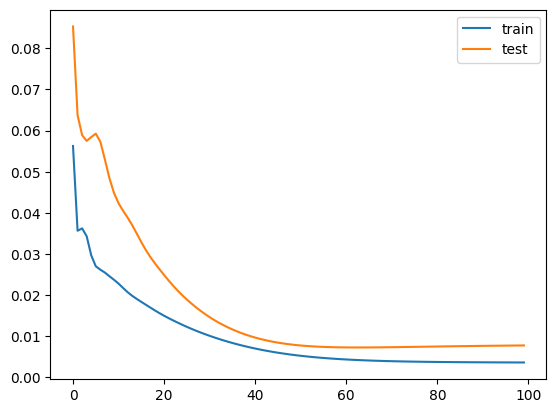

1/1 [==============================] - 0s 370ms/step
Test RMSE for LSTM: 164.931


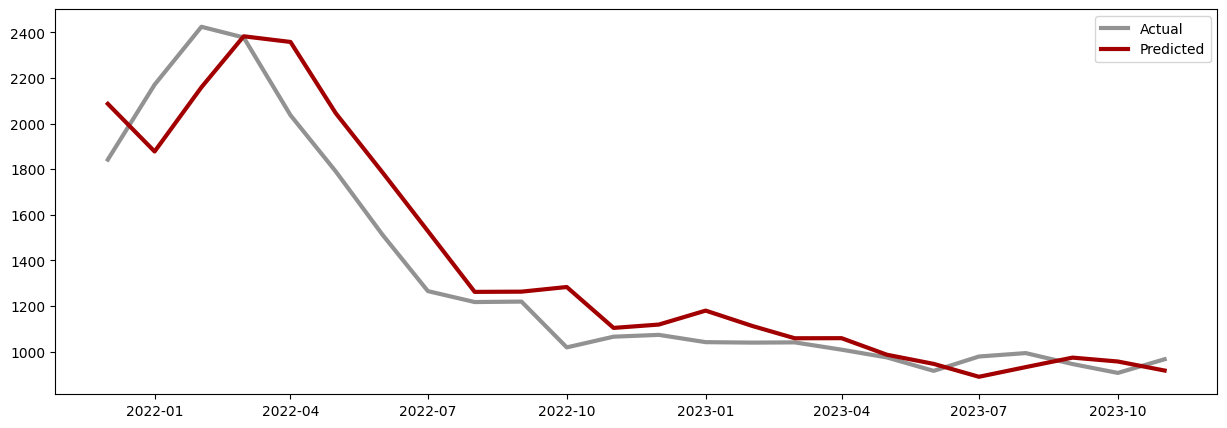

Test set results: 
         date   prediction  actual
0  2021-12-01  2086.896417  1842.0
1  2022-01-01  1877.643001  2171.0
2  2022-02-01  2159.502399  2425.0
3  2022-03-01  2383.254247  2378.0
4  2022-04-01  2358.381425  2037.0
5  2022-05-01  2045.532117  1790.0
6  2022-06-01  1785.481187  1512.0
7  2022-07-01  1528.427257  1265.0
8  2022-08-01  1261.619425  1217.0
9  2022-09-01  1262.625667  1219.0
10 2022-10-01  1283.000365  1018.0
11 2022-11-01  1103.541122  1065.0
12 2022-12-01  1118.235139  1073.0
13 2023-01-01  1179.436083  1041.0
14 2023-02-01  1111.840700  1039.0
15 2023-03-01  1058.113710  1040.0
16 2023-04-01  1058.485501  1008.0
17 2023-05-01   985.928750   974.0
18 2023-06-01   945.693867   915.0
19 2023-07-01   889.072195   978.0
20 2023-08-01   931.515453   993.0
21 2023-09-01   973.157605   945.0
22 2023-10-01   956.114891   906.0
23 2023-11-01   916.429456   966.0


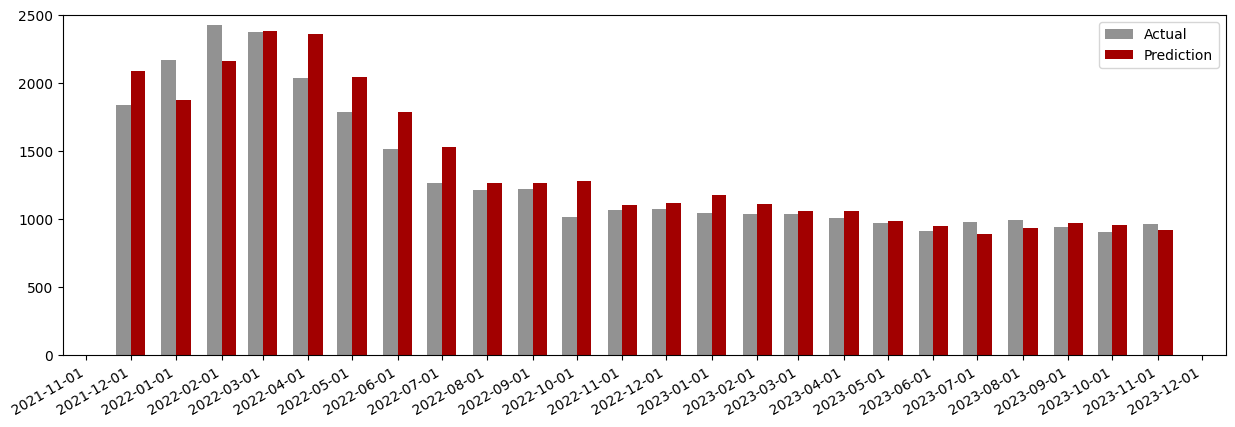

1/1 [==============================] - 0s 14ms/step
Forecasted dataframe: 
            forecasted_data
2023-12-01       916.429568
2024-01-01      1003.757324
2024-02-01      1034.049143
2024-03-01      1093.813191
2024-04-01      1148.520396
2024-05-01      1168.567258


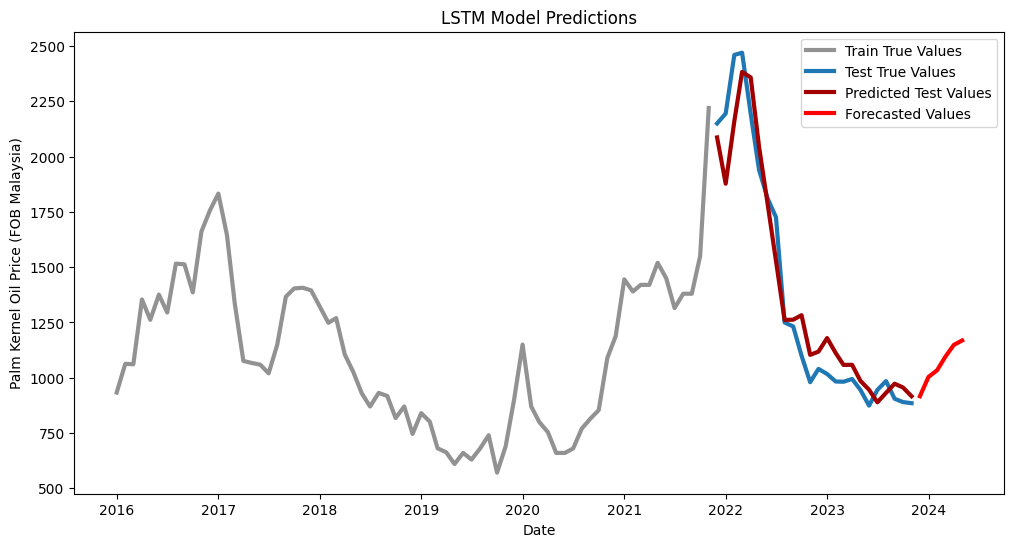

Specs: batch_size=18, n_months=1, RMSE=164.9305870066261
Training model with batch_size=24, n_months=1, and test_months=24...
Our total data have shape:  (166, 26)
Train and test shapes are:  (142, 26) (24, 26)
Train X,y and Test X,y are:  (142, 1, 13) (142,) (24, 1, 13) (24,)
Epoch 1/100
5/5 - 1s - loss: 0.1573 - val_loss: 0.1724 - 959ms/epoch - 192ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0722 - val_loss: 0.0897 - 62ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0457 - val_loss: 0.0601 - 55ms/epoch - 11ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0475 - val_loss: 0.0538 - 52ms/epoch - 10ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0491 - val_loss: 0.0520 - 53ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0437 - val_loss: 0.0525 - 52ms/epoch - 10ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0374 - val_loss: 0.0557 - 51ms/epoch - 10ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0344 - val_loss: 0.0589 - 52ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0337 - val_loss: 0.0588 - 57ms/epoch - 11ms/step


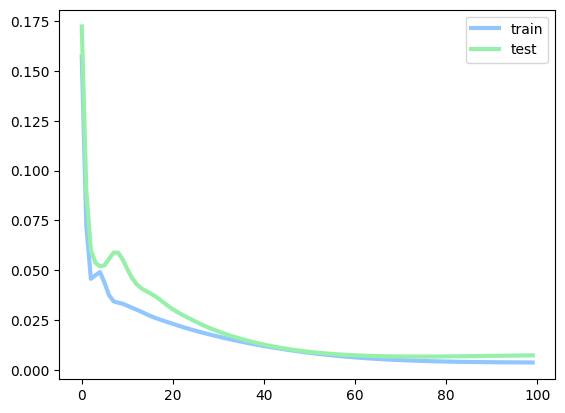

1/1 [==============================] - 0s 192ms/step
Test RMSE for LSTM: 159.918


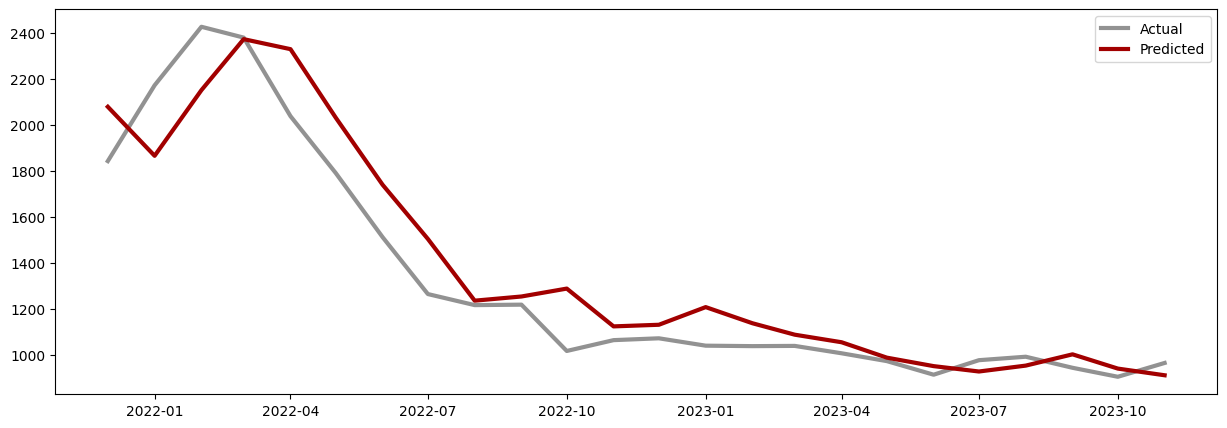

Test set results: 
         date   prediction  actual
0  2021-12-01  2077.790148  1842.0
1  2022-01-01  1864.977887  2171.0
2  2022-02-01  2149.936264  2425.0
3  2022-03-01  2371.310038  2378.0
4  2022-04-01  2327.857411  2037.0
5  2022-05-01  2030.362708  1790.0
6  2022-06-01  1739.406647  1512.0
7  2022-07-01  1504.170679  1265.0
8  2022-08-01  1236.320025  1217.0
9  2022-09-01  1254.454765  1219.0
10 2022-10-01  1288.742984  1018.0
11 2022-11-01  1124.708437  1065.0
12 2022-12-01  1131.734981  1073.0
13 2023-01-01  1208.385699  1041.0
14 2023-02-01  1138.300151  1039.0
15 2023-03-01  1088.678159  1040.0
16 2023-04-01  1055.894919  1008.0
17 2023-05-01   989.013014   974.0
18 2023-06-01   952.219832   915.0
19 2023-07-01   928.891250   978.0
20 2023-08-01   954.468083   993.0
21 2023-09-01  1003.400082   945.0
22 2023-10-01   941.556700   906.0
23 2023-11-01   912.543388   966.0


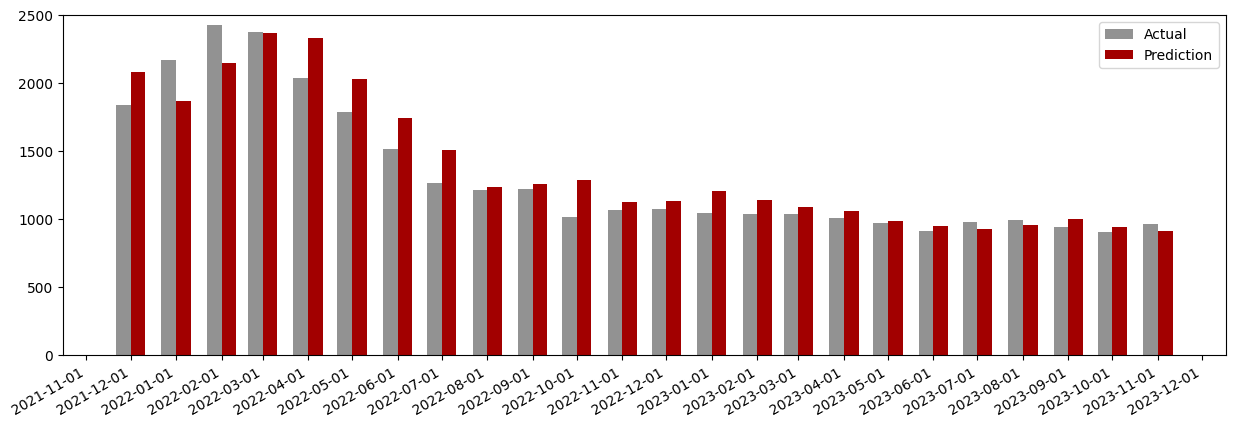

1/1 [==============================] - 0s 14ms/step
Forecasted dataframe: 
            forecasted_data
2023-12-01       912.543416
2024-01-01      1044.742545
2024-02-01      1138.562589
2024-03-01      1179.520975
2024-04-01      1251.824698
2024-05-01      1280.781072


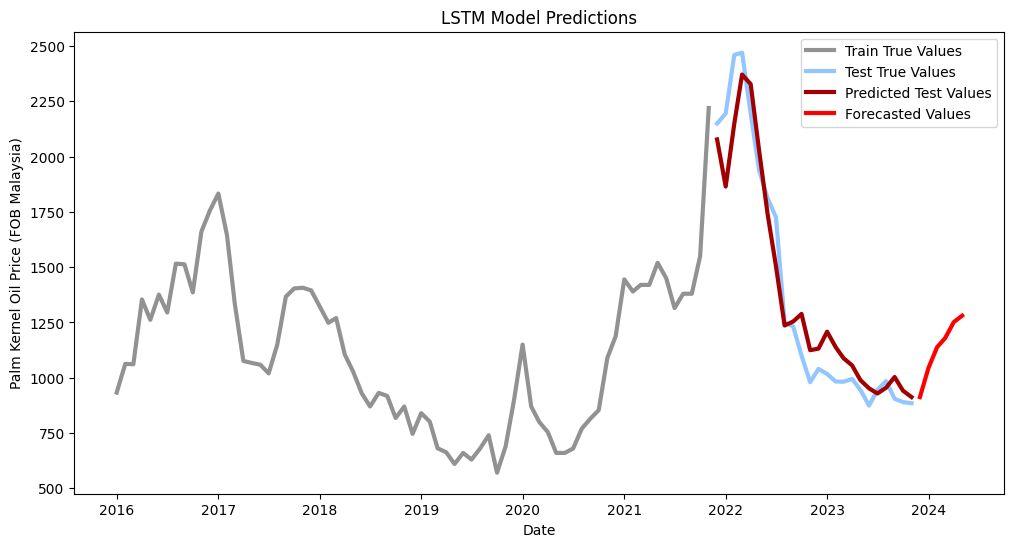

Specs: batch_size=24, n_months=1, RMSE=159.91775066281383
Training model with batch_size=32, n_months=1, and test_months=24...
Our total data have shape:  (166, 26)
Train and test shapes are:  (142, 26) (24, 26)
Train X,y and Test X,y are:  (142, 1, 13) (142,) (24, 1, 13) (24,)
Epoch 1/100
5/5 - 1s - loss: 0.1095 - val_loss: 0.1281 - 988ms/epoch - 198ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0563 - val_loss: 0.0730 - 59ms/epoch - 12ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0465 - val_loss: 0.0564 - 58ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0486 - val_loss: 0.0525 - 60ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0455 - val_loss: 0.0517 - 56ms/epoch - 11ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0392 - val_loss: 0.0538 - 59ms/epoch - 12ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0350 - val_loss: 0.0565 - 53ms/epoch - 11ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0335 - val_loss: 0.0567 - 51ms/epoch - 10ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0326 - val_loss: 0.0535 - 52ms/epoch - 10ms/step

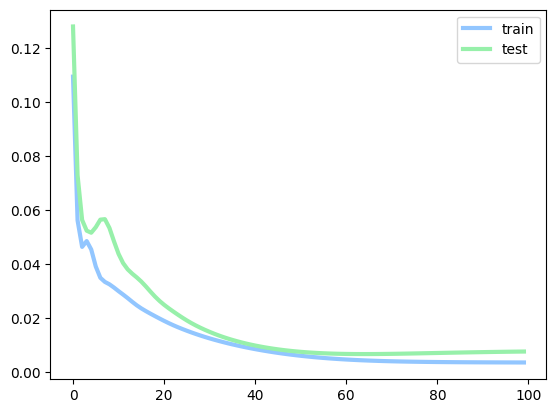

1/1 [==============================] - 0s 209ms/step
Test RMSE for LSTM: 164.385


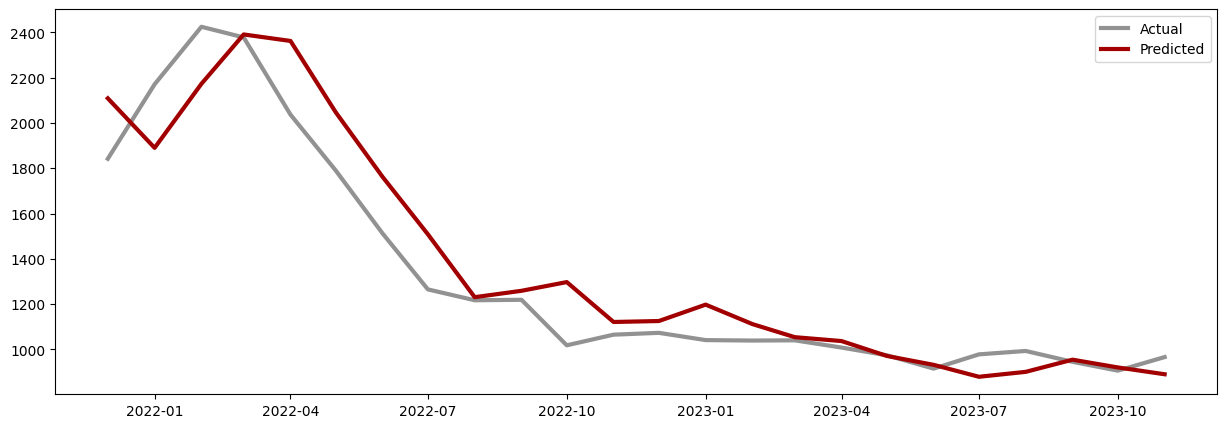

Test set results: 
         date   prediction  actual
0  2021-12-01  2108.986814  1842.0
1  2022-01-01  1890.231937  2171.0
2  2022-02-01  2172.960466  2425.0
3  2022-03-01  2391.100104  2378.0
4  2022-04-01  2362.352999  2037.0
5  2022-05-01  2047.019390  1790.0
6  2022-06-01  1761.928314  1512.0
7  2022-07-01  1508.402176  1265.0
8  2022-08-01  1230.567354  1217.0
9  2022-09-01  1258.751942  1219.0
10 2022-10-01  1297.237030  1018.0
11 2022-11-01  1121.052190  1065.0
12 2022-12-01  1125.221080  1073.0
13 2023-01-01  1197.668784  1041.0
14 2023-02-01  1111.671643  1039.0
15 2023-03-01  1053.941302  1040.0
16 2023-04-01  1036.753658  1008.0
17 2023-05-01   971.061739   974.0
18 2023-06-01   931.698556   915.0
19 2023-07-01   878.974568   978.0
20 2023-08-01   900.752068   993.0
21 2023-09-01   954.514885   945.0
22 2023-10-01   920.204188   906.0
23 2023-11-01   890.103206   966.0


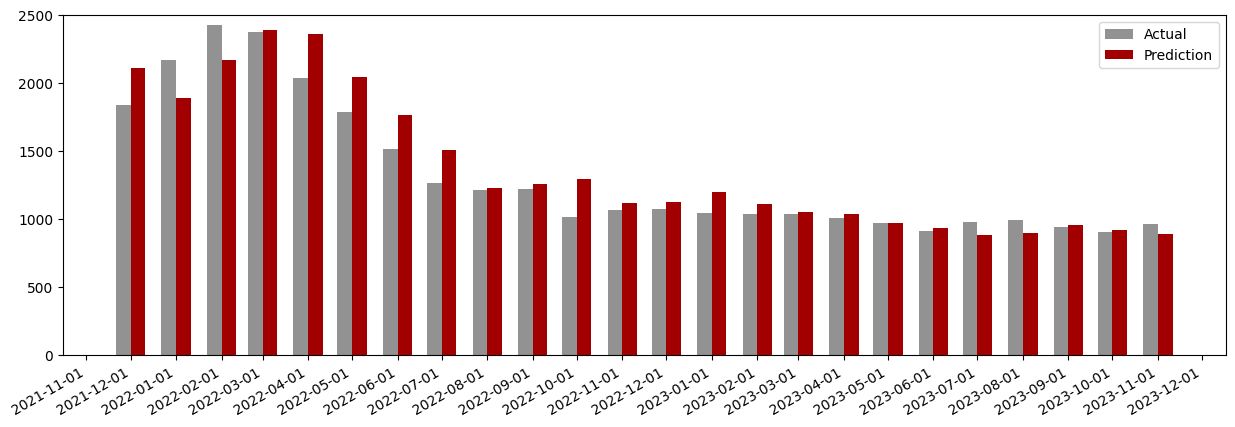

1/1 [==============================] - 0s 13ms/step
Forecasted dataframe: 
            forecasted_data
2023-12-01       890.103262
2024-01-01      1047.082586
2024-02-01      1150.304231
2024-03-01      1232.775645
2024-04-01      1342.154982
2024-05-01      1370.891196


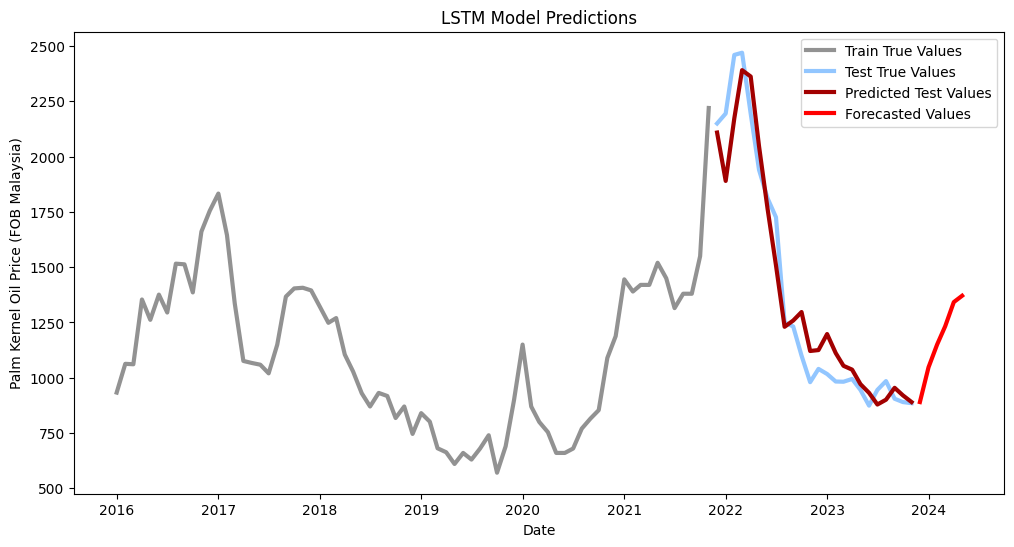

Specs: batch_size=32, n_months=1, RMSE=164.38524880614554
Training model with batch_size=36, n_months=1, and test_months=24...
Our total data have shape:  (166, 26)
Train and test shapes are:  (142, 26) (24, 26)
Train X,y and Test X,y are:  (142, 1, 13) (142,) (24, 1, 13) (24,)
Epoch 1/100
5/5 - 1s - loss: 0.1500 - val_loss: 0.1791 - 1s/epoch - 252ms/step
Epoch 2/100
5/5 - 0s - loss: 0.0791 - val_loss: 0.1077 - 71ms/epoch - 14ms/step
Epoch 3/100
5/5 - 0s - loss: 0.0559 - val_loss: 0.0797 - 61ms/epoch - 12ms/step
Epoch 4/100
5/5 - 0s - loss: 0.0557 - val_loss: 0.0717 - 58ms/epoch - 12ms/step
Epoch 5/100
5/5 - 0s - loss: 0.0568 - val_loss: 0.0685 - 66ms/epoch - 13ms/step
Epoch 6/100
5/5 - 0s - loss: 0.0525 - val_loss: 0.0669 - 63ms/epoch - 13ms/step
Epoch 7/100
5/5 - 0s - loss: 0.0465 - val_loss: 0.0673 - 59ms/epoch - 12ms/step
Epoch 8/100
5/5 - 0s - loss: 0.0423 - val_loss: 0.0683 - 56ms/epoch - 11ms/step
Epoch 9/100
5/5 - 0s - loss: 0.0402 - val_loss: 0.0680 - 61ms/epoch - 12ms/step
Ep

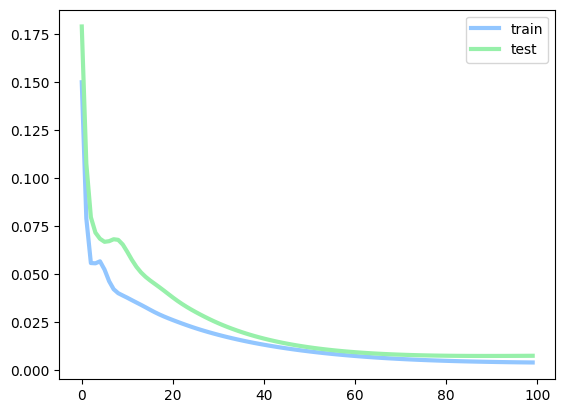

1/1 [==============================] - 0s 200ms/step
Test RMSE for LSTM: 163.341


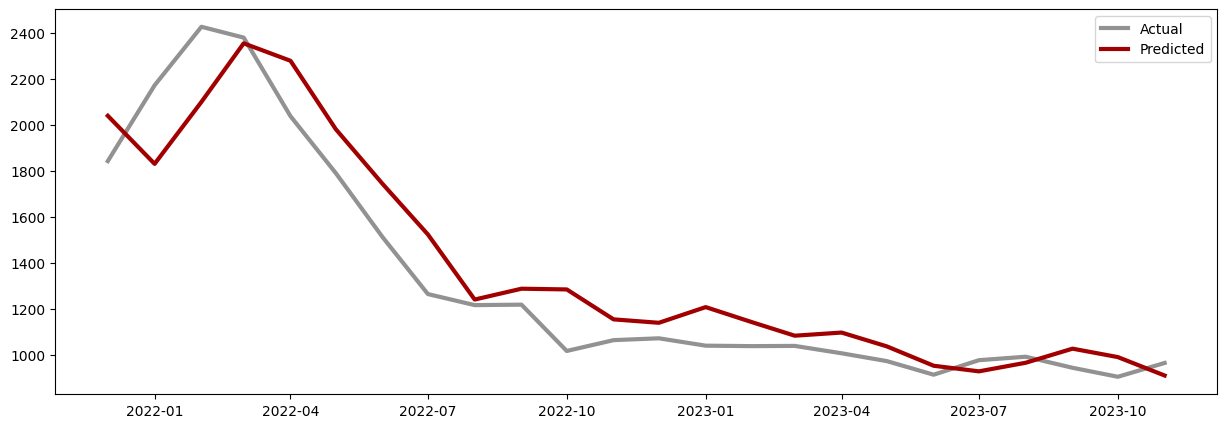

Test set results: 
         date   prediction  actual
0  2021-12-01  2038.660500  1842.0
1  2022-01-01  1830.016179  2171.0
2  2022-02-01  2098.870896  2425.0
3  2022-03-01  2353.235895  2378.0
4  2022-04-01  2277.414431  2037.0
5  2022-05-01  1980.637395  1790.0
6  2022-06-01  1743.106792  1512.0
7  2022-07-01  1523.760803  1265.0
8  2022-08-01  1241.207475  1217.0
9  2022-09-01  1288.217495  1219.0
10 2022-10-01  1285.058980  1018.0
11 2022-11-01  1155.166549  1065.0
12 2022-12-01  1140.291635  1073.0
13 2023-01-01  1208.410049  1041.0
14 2023-02-01  1142.347959  1039.0
15 2023-03-01  1084.267218  1040.0
16 2023-04-01  1097.933882  1008.0
17 2023-05-01  1037.937836   974.0
18 2023-06-01   953.890850   915.0
19 2023-07-01   929.537374   978.0
20 2023-08-01   966.890671   993.0
21 2023-09-01  1028.028003   945.0
22 2023-10-01   991.436382   906.0
23 2023-11-01   911.524274   966.0


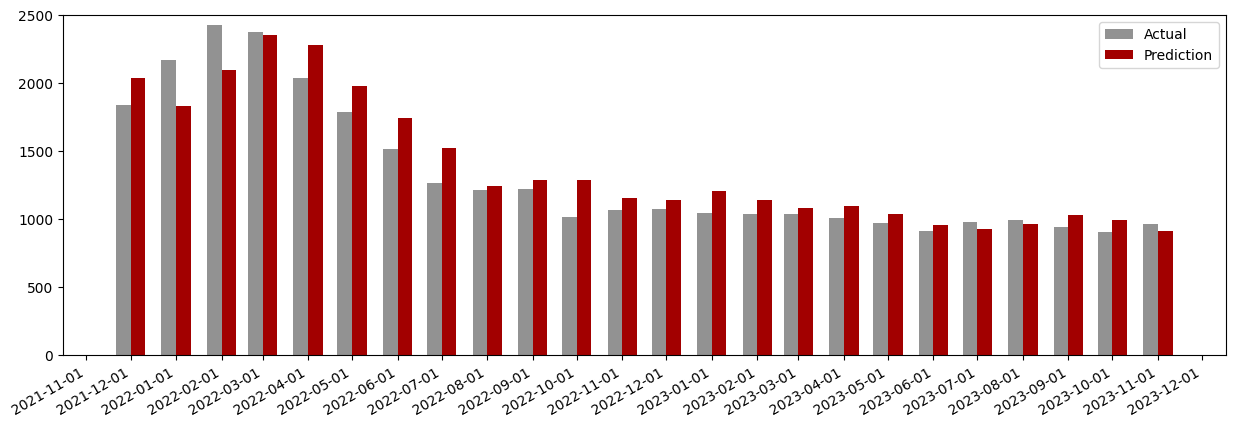

1/1 [==============================] - 0s 13ms/step
Forecasted dataframe: 
            forecasted_data
2023-12-01       911.524274
2024-01-01      1138.108811
2024-02-01      1326.446961
2024-03-01      1449.248621
2024-04-01      1471.669926
2024-05-01      1403.331911


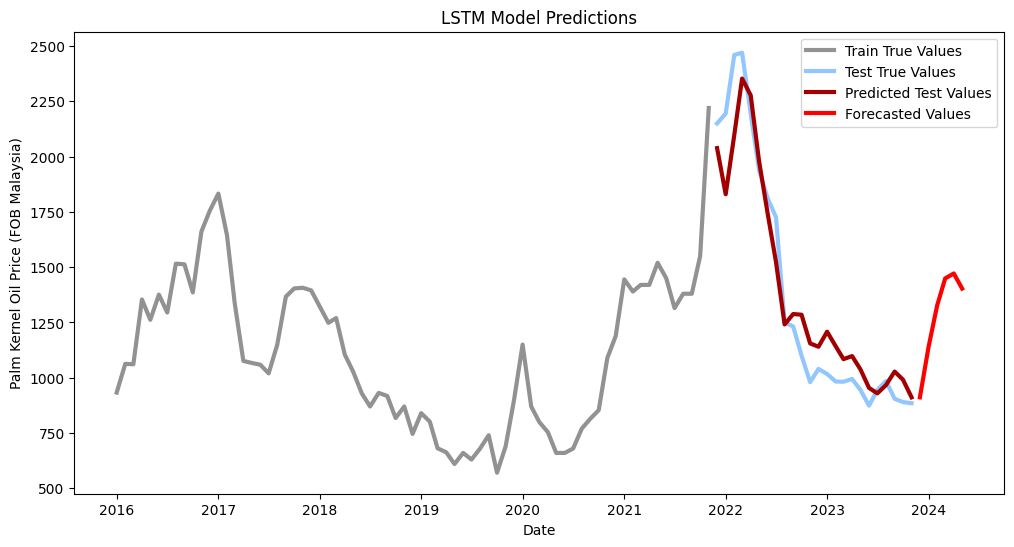

Specs: batch_size=36, n_months=1, RMSE=163.34139023137578


In [24]:
def fine_tune_and_visualize(data, batch_sizes, n_months_options, future_steps):
        # Define other parameters like n_features, n_train_months here or calculate based on data
    for test_months in [24]:  
        for batch_size in batch_sizes:
            for n_months in n_months_options:
                print(f"Training model with batch_size={batch_size}, n_months={n_months}, and test_months={test_months}...")

                # Prepare the data for this configuration (use your existing data preparation code)
                # Our best model up until now: n_months = 6, n_features = 12, n_train_months = 149
                n_features = data.shape[1]
                values = data.values
                # keep only the first 11 columns
                values = values[:, 0:n_features]
                # normalize features
                scaler = MinMaxScaler(feature_range=(0, 1))
                scaled = scaler.fit_transform(values)
                # specify the number of lag months
                n_months = n_months
                n_rest = 21
                # frame as 
                reframed = series_to_supervised(scaled, n_features, n_months, 1)
                print("Our total data have shape: ",reframed.shape)

                # Split in train and test
                values=reframed.values
                n_train_months = reframed.shape[0] - test_months
                train = values[:n_train_months, :]
                test = values[n_train_months:, :]

                print("Train and test shapes are: ", train.shape, test.shape)

                # split into input and outputs
                n_obs = n_months * n_features
                train_X, train_y = train[:, :n_obs], train[:, -n_features]
                test_X, test_y = test[:, :n_obs], test[:, -n_features]
                # reshape input to be 3D [samples, timesteps, features]
                train_X = train_X.reshape((train_X.shape[0], n_months, n_features))
                test_X = test_X.reshape((test_X.shape[0], n_months, n_features))
                print("Train X,y and Test X,y are: ", train_X.shape, train_y.shape, test_X.shape, test_y.shape)


                import matplotlib.pyplot as plt
                import matplotlib.dates as mdates
                from datetime import timedelta
                # Define and train the model (use your model training code)
                # design network LSTM
                #model = Sequential()
                #model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
                #model.add(Dense(1))
                #model.compile(loss='mean_squared_error', optimizer='adam')
                ## fit network
                #history = model.fit(train_X, train_y, epochs=100, batch_size=batch_size, validation_data=(test_X, test_y), verbose=2, shuffle=False)
                ## plot history
                #plt.plot(history.history['loss'], label='train')
                #plt.plot(history.history['val_loss'], label='test')
                #plt.legend()
                #plt.show()

                from keras.layers import GRU
                # design network
                model2 = Sequential()
                model2.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
                model2.add(Dense(1))
                model2.compile(loss='mean_squared_error', optimizer='adam')
                # fit network
                history = model2.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
                # plot history
                plt.plot(history.history['loss'], label='train')
                plt.plot(history.history['val_loss'], label='test')
                plt.legend()
                plt.show()

                # for LSTM  
                # Generate predictions for the test set and calculate RMSE
                test_X_reshaped = test_X.reshape((test_X.shape[0], n_months, n_features))
                yhat = model2.predict(test_X_reshaped)
                yhat

                test_X = test_X.reshape((test_X.shape[0], n_months*n_features))
                test_X.shape

                # invert scaling for forecast
                inv_yhat = concatenate((yhat, test_X[:, -((n_features-1)):]), axis=1)
                inv_yhat = scaler.inverse_transform(inv_yhat)
                inv_yhat = inv_yhat[:,0]
                # invert scaling for actual
                test_y = test_y.reshape((len(test_y), 1))
                inv_y = concatenate((test_y, test_X[:, -(n_features-1):]), axis=1)
                inv_y = scaler.inverse_transform(inv_y)
                inv_y = inv_y[:,0]
                # calculate 
                rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
                print('Test RMSE for LSTM: %.3f' % rmse)

                # Print test set graph:
                # plot the actual and predicted values for the test data , x-axis should be date
                plt.figure(figsize=(15, 5))
                plt.rcParams['lines.linewidth'] = 3
                plt.plot(data.index[-(test_y.shape[0]):], inv_y, label='Actual', color='#929292')
                plt.plot(data.index[-(test_y.shape[0]):], inv_yhat, label='Predicted', color='#A20000')
                plt.legend()
                plt.show()

                # create a dataframe with the dates, inv_yhat and inv_y
                dates = data.index[n_train_months+n_months:]
                df_results = pd.DataFrame({'date': dates, 'prediction': inv_yhat, 'actual': inv_y})
                print("Test set results: ")
                print(df_results)

                # Assuming df_results is your DataFrame with 'date', 'prediction', and 'actual' columns
                plt.figure(figsize=(15, 5))
                plt.ylim(0, 2500)

                # Convert dates to matplotlib date format
                dates = mdates.date2num(df_results['date'])

                # Width of a bar
                bar_width = 10  # You might need to adjust this based on your date scale

                # Plotting
                # GIVE ME LIGHT GRAY COLOR FOR THE FIRST BAR
                plt.bar(dates - bar_width/2, df_results['actual'], width=bar_width, color='#929292', align='center', label='Actual')
                plt.bar(dates + bar_width/2, df_results['prediction'], width=bar_width, color='#A20000', align='center', label='Prediction')

                # Formatting dates on the x-axis
                plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
                plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
                plt.gcf().autofmt_xdate()  # Rotation

                plt.legend()
                plt.show()

                
                # Forecast future values (use your forecasting code)
                test_X = test_X.reshape((test_X.shape[0], n_months, n_features))

                # Forecasting with dynamic feature update using monthly averages
                last_sequence = test_X[-1]  # Last known sequence
                forecast = []

                for i in range(future_steps):
                    # Predict the next step
                    prediction = model2.predict(last_sequence.reshape(1, n_months, n_features))
                    forecast.append(prediction[0, 0])
                    
                    # Update the sequence
                    new_sequence = np.roll(last_sequence, -1, axis=1)

                    # Update the target feature with the prediction
                    new_sequence[-1, 0] = prediction[0, 0]

                    # Update other features with their respective monthly averages
                    # Assuming the month for forecasting is determined by (current month + i) % 12
                    forecast_month = (averages_df.index[-1] + i) % 12 + 1
                    monthly_averages = averages_df_arr[forecast_month - 1, 1:13]  # Get the averages for the forecast month
                    new_sequence[-1, 1:] = monthly_averages # Update other features with monthly averages

                    last_sequence = new_sequence

                # Prepare the data for inverse transformation
                forecast_data = np.zeros((len(forecast), n_features))
                forecast_data[:, 0] = forecast  # Update the target feature with forecasted values
                forecast_data[:, 1:] = last_sequence[-1, 1:]  # Update with the last known feature values

                inv_forecast = scaler.inverse_transform(forecast_data)
                inv_forecast = inv_forecast[:, 0]  # Extract the forecasted target values

                # Create a DataFrame for the forecasted values
                forecast_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='MS')[1:]
                forecast_df = pd.DataFrame({'forecasted_data': inv_forecast}, index=forecast_dates)

                # Print or visualize the forecasted data
                print("Forecasted dataframe: ")
                print(forecast_df)

                # DataFrames for results and forecast
                # make plot line bold and bigger
                plt.rcParams['lines.linewidth'] = 3
                plt.figure(figsize=(12, 6))
                plt.plot(df.index[72:n_train_months+n_months], df['pko_fob_malaysia'][72:n_train_months+n_months], label='Train True Values', color='#929292')
                plt.plot(df.index[n_train_months+n_months:], df['pko_fob_malaysia'][n_train_months+n_months:], label='Test True Values')
                #plot with dashed line the line connecting the last value of train and first value of test set
                #plt.plot([df.index[n_train_months+n_months-1], df.index[n_train_months+n_months]], [df['pko_cif_rotterdam'][n_train_months+n_months-1], df['pko_cif_rotterdam'][n_train_months+n_months]], linestyle='dashed')
                # also plot the predicted test values
                plt.plot(df_results['date'], df_results['prediction'], label='Predicted Test Values', color='#A20000')
                plt.plot(forecast_df.index, forecast_df['forecasted_data'], label='Forecasted Values', color='red')
                plt.title('LSTM Model Predictions')
                plt.xlabel('Date')
                plt.ylabel('Palm Kernel Oil Price (FOB Malaysia)')
                # add a nice theme 
                plt.style.use('seaborn-v0_8-pastel')
                plt.legend()
                plt.show()

                # Print RMSE, specs, and DataFrames
                print(f"Specs: batch_size={batch_size}, n_months={n_months}, RMSE={rmse}")

# Call the function with the desired parameters
fine_tune_and_visualize(data, batch_sizes=[18, 24, 32, 36], n_months_options=[1], future_steps=6)
